In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
datanames = [('wvs_w7', 'wvs'),('pew', 'pew')]
lms = ['mcm', 'gpt2_token_pairs', 'gpt2-medium_token_pairs','gpt2-large_token_pairs', 'gpt3', 'gpt3_token_pairs']
lms_names = ['SBERT', 'GPT2', 'GPT2-MEDIUM','GPT2-LARGE','GPT3-QA','GPT3-PROBS']
lm_scores = ['mcm_score','log prob difference','log prob difference','log prob difference', 'gpt3_score_mean','log prob difference']

In [3]:
main_models = ['mcm','gpt2-large_token_pairs','gpt3_token_pairs']
appendix_models = ['gpt2_token_pairs','gpt2-medium_token_pairs','gpt3']

In [5]:
pew_mcm = pd.read_csv('../data/pew_mcm.csv')

pew_gpt3 = pd.read_csv('../data/pew_gpt3.csv')

pew_gpt2 = pd.read_csv('../data/new_res/pew_gpt2-large_token_pairs_people.csv')

uni_pew_gpt = pd.read_csv('../data/universal_pew_gpt3.csv')

pew_gpt2 = pew_gpt2.loc[pew_gpt2['country'] != 'universal']
pew_gpt2_universal = pew_gpt2.loc[pew_gpt2['country'] == 'universal']

pew_gpt3_token_pairs = pd.read_csv('../data/new_res/pew_gpt3_token_pairs_people.csv')
pew_gpt3_universal_token_pairs = pew_gpt3_token_pairs.loc[pew_gpt3_token_pairs.country == 'universal']
pew_gpt3_cultural_token_pairs = pew_gpt3_token_pairs.loc[pew_gpt3_token_pairs['country'] != 'universal']
pew_gpt3_cultural_token_pairs['universal log prob difference'] = \
[float(pew_gpt3_universal_token_pairs.loc[pew_gpt3_universal_token_pairs.topic == t]['log prob difference'])
 for t in list(pew_gpt3_cultural_token_pairs.topic)]






In [6]:
wave = 7
wvs_mcm = pd.read_csv(f'../data/wvs_w{wave}_mcm.csv')
wvs_gpt3 = pd.read_csv('../data/wvs_w7_gpt3.csv')

wvs_gpt2 = pd.read_csv('../data/new_res/wvs_w7_gpt2-large_token_pairs_people.csv')
wvs_gpt2_universal = wvs_gpt2.loc[wvs_gpt2.country == 'universal']
wvs_gpt2 = wvs_gpt2.loc[wvs_gpt2.country !=' universal']


wvs_gpt3_tk =  pd.read_csv('../data/new_res/wvs_w7_gpt3_token_pairs_people.csv')
wvs_gpt3_universal = wvs_gpt3_tk.loc[wvs_gpt3_tk.country == 'universal']
wvs_gpt3_tk = wvs_gpt3_tk.loc[(~pd.isna(wvs_gpt3_tk['wvs_score'])) & (wvs_gpt3_tk.country != 'universal')]



In [7]:
pew_topics = {'using contraceptives':['using contraceptives', 'use contraceptives'],
           'getting a divorce': ['getting a divorce','get a divorce'], 
           'having an abortion': ['having an abortion','have an abortion'],
           'homosexuality': ['homosexuality','be homosexual'], 
           'drinking alcohol': ['drinking alcohol','drink alcohol'],
           'married people having an affair' : ['married people having an affair', 'have an extramarital affair'],
            'gambling': ['gambling','gamble'],
       'sex between unmarried adults': [ 'sex between unmarried adults','have sex between unmarried adults']
                         }
pew_topics_list = list(pew_topics.keys())
topics = list(wvs_gpt3.topic.unique())

In [8]:
variation_rows = []
for lm_index in range(len(lms)):

        
    data_index = 0


    lm = lms[lm_index]
    data_name = datanames[data_index]
    if 'token_pairs' in lm:
        data = pd.read_csv(f'../data/new_res/{data_name[0]}_{lm}_people.csv')
    else:
        data = pd.read_csv(f'../data/{data_name[0]}_{lm}.csv')
    topic_col = 'topic' if 'topic' in data.columns else 'question'
    wvs_topics = data[topic_col].unique() 

    for t in topics:

        data_t = data.loc[data[topic_col]==t]
        user_var = np.var(data_t[f'{data_name[1]}_score'])
        model_var = np.var(data_t[f'{lm_scores[lm_index]}'])

        row = {'dataname': data_name[1].upper(), 'model': lms_names[lm_index], 'user variation': user_var, 'model variation': model_var, 'topic': t}
        variation_rows.append(row)

        variation_rows.append(row)
        
    
    data_index = 1
    

    lm = lms[lm_index]
    data_name = datanames[data_index]
#     data = pd.read_csv(f'../data/{data_name[0]}_{lm}.csv')
    if 'token_pairs' in lm:
        data = pd.read_csv(f'../data/new_res/{data_name[0]}_{lm}_people.csv')
    else:
        data = pd.read_csv(f'../data/{data_name[0]}_{lm}.csv')
        
        
        
    topic_col = 'topic' if 'topic' in data.columns else 'question'


    for t in pew_topics:

        data_t = data.loc[data[topic_col].isin(pew_topics[t])]
        user_var = np.var(data_t[f'{data_name[1]}_score'])
        model_var = np.var(data_t[f'{lm_scores[lm_index]}'])

        row = {'dataname': data_name[1].upper(), 'model': lms_names[lm_index], 'user variation': user_var, 'model variation': model_var, 'topic': t}
        variation_rows.append(row)

        variation_rows.append(row)

    


In [9]:
df = pd.DataFrame(variation_rows)


In [10]:
df

,dataname,model,user variation,model variation,topic
0,WVS,SBERT,0.050250,0.000919,claiming government benefits to which you are ...
1,WVS,SBERT,0.050250,0.000919,claiming government benefits to which you are ...
2,WVS,SBERT,0.039342,0.004738,avoiding a fare on public transport
3,WVS,SBERT,0.039342,0.004738,avoiding a fare on public transport
4,WVS,SBERT,0.015135,0.006704,stealing property
...,...,...,...,...,...
319,PEW,GPT3-PROBS,0.033087,0.335896,married people having an affair
320,PEW,GPT3-PROBS,0.100356,0.239502,gambling
321,PEW,GPT3-PROBS,0.100356,0.239502,gambling
322,PEW,GPT3-PROBS,0.262236,0.193126,sex between unmarried adults


In [11]:
variations = df.loc[(df.model =='SBERT')][['user variation','topic','dataname']].groupby(['topic','dataname']).mean()

variations = variations.reset_index()
# variations.to_csv('../data/variations.csv',index = False)

In [12]:
def draw_model(models, prefix):
    list_rows = []
    fig, axes = plt.subplots(2, len(models) ,figsize = (4 * len(models), 3), sharey = False, sharex = True)
    plt.subplots_adjust(hspace=0.8)
    for i in range(len(models)):
        for j, dataname in enumerate(datanames):
            
            model = lms_names[lms.index(models[i])]
            
            topics_list = pew_topics_list if j == 1 else list(wvs_topics)

            model_df = df.loc[(df.model == model) & (df.dataname == dataname[1].upper())]

            model_df['topic '] = [f'{topics_list.index(t) + 1}) {t}'for t in model_df['topic']]

            ax = axes[j][i]
            
            g = sns.regplot(data = model_df, x= 'user variation', y = 'model variation',ax= ax,
                           color = 'grey')
            g = sns.scatterplot(data = model_df, x= 'user variation', y = 'model variation',
                                hue = 'topic ', ax = ax, legend = True)

            ax.set_ylabel('')
            ax.set_xlabel('')

            ax.set_title(model)
#             if i == 0 and j == 0:
#                  ax.legend(ncol=3,bbox_to_anchor=(-1, 1.15))
#             else:
            ax.legend().remove()

            for _, row in model_df.iterrows():
                x = row['user variation']
                y = row['model variation']
                s = topics_list.index(row['topic'])
                ax.text(x = x, y = y, s = s + 1)

            slope, intercept, r_value, p_value, std_err =\
            stats.linregress(model_df['model variation'],model_df['user variation'])

            row = {'model': model, 'r': r_value, 'p': p_value, 'data': dataname}
            list_rows.append(row)

        sns.despine(fig=None, ax=None,left=False, bottom=False, offset=None, trim=False)
#
#         plt.savefig(f'figs/figure_3_{prefix}.png', bbox_inches = 'tight', dpi = 200)

    return list_rows



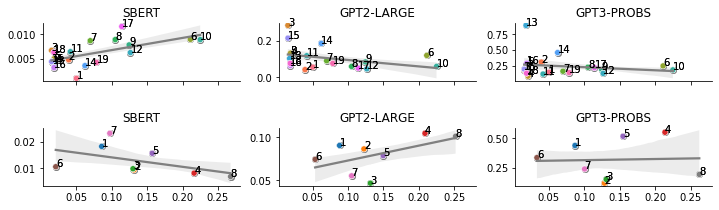

In [13]:
list_rows = draw_model(main_models,'main')

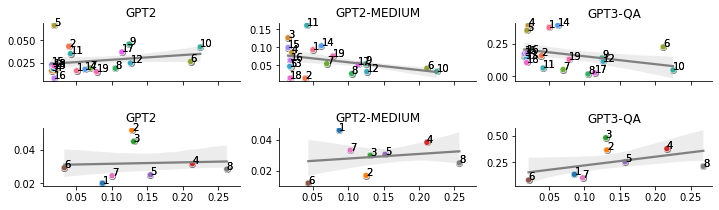

In [14]:
list_rows += draw_model(appendix_models,'app')

In [15]:
import statsmodels.stats.multitest
df = pd.DataFrame(list_rows)
df['corrected p'] = statsmodels.stats.multitest.multipletests(df['p'], alpha=0.05, method='bonferroni', \
                                                              is_sorted=False, returnsorted=False)[1]

In [16]:
df


,model,r,p,data,corrected p
0,SBERT,0.618220,0.000035,"(wvs_w7, wvs)",0.000424
1,SBERT,-0.480666,0.059475,"(pew, pew)",0.713701
2,GPT2-LARGE,-0.355696,0.028405,"(wvs_w7, wvs)",0.340862
3,GPT2-LARGE,0.541574,0.030255,"(pew, pew)",0.363055
4,GPT3-PROBS,-0.176327,0.289614,"(wvs_w7, wvs)",1.000000
5,GPT3-PROBS,0.041209,0.879558,"(pew, pew)",1.000000
6,GPT2,0.231210,0.162512,"(wvs_w7, wvs)",1.000000
7,GPT2,0.056599,0.835076,"(pew, pew)",1.000000
8,GPT2-MEDIUM,-0.357290,0.027653,"(wvs_w7, wvs)",0.331840
9,GPT2-MEDIUM,0.183811,0.495590,"(pew, pew)",1.000000
